In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPool2D
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [18]:
os.getcwd()

'C:\\Users\\AKSHY\\DL_Keras\\Emotion Classification'

In [19]:
picture_size = 48
folder_path = os.getcwd()

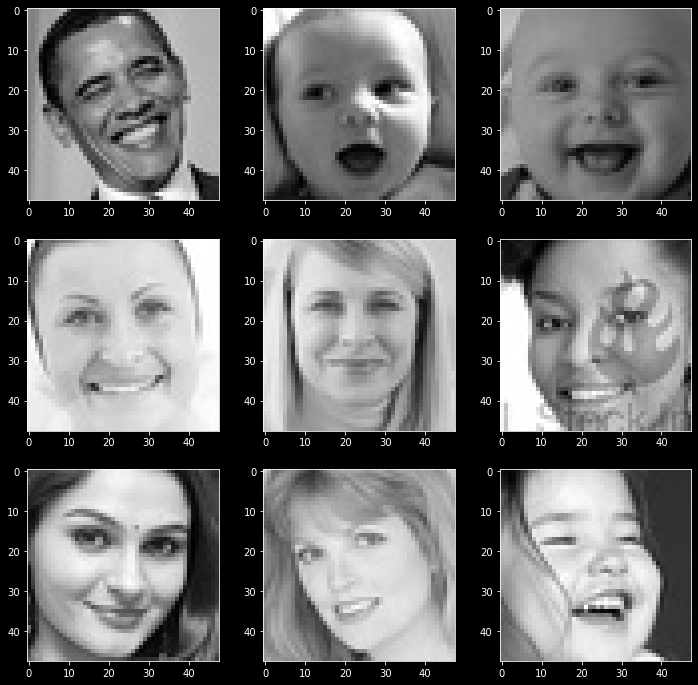

In [20]:
expression = "happy"
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img=load_img(folder_path+"\\train\\"+ expression +"\\"+ 
                 os.listdir(folder_path+'\\train\\'+expression+"\\")[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()

In [21]:
batch_size = 128
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"\\train\\",target_size=(picture_size,picture_size),
                                        color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"\\validation\\",target_size=(picture_size,picture_size),
                                        color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [22]:
no_of_classes = 7
model = Sequential()

In [23]:
# 1st CNN Layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd CNN Layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd CNN Layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4th CNN Layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully Connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

C:\Users\AKSHY\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
checkpoint = ModelCheckpoint("./model.h5",monitor='val_acc',verbose=1,save_best_only=True,mode="max") 
early_stopping = EarlyStopping(monitor="val_loss",min_delta=0,patience=3,verbose=1,restore_best_weights=True)
reduce_learning_rate = ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learning_rate]
epochs = 48

NameError: name 'history' is not defined

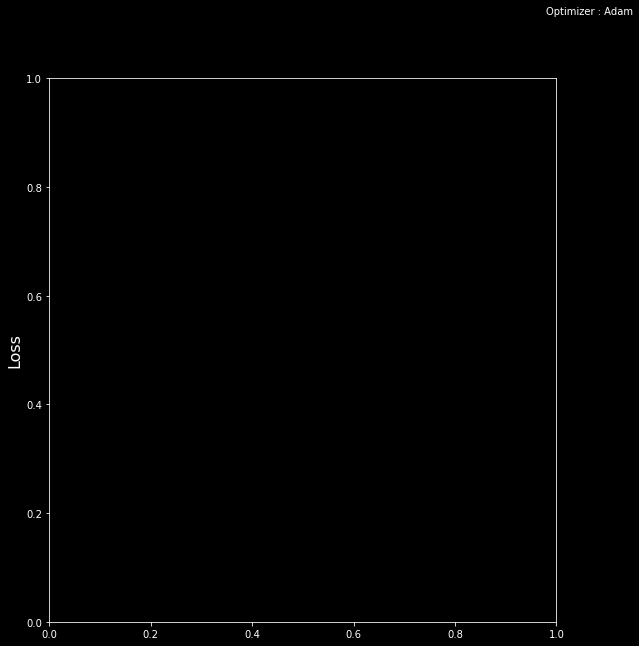

In [25]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()